In [380]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from   sklearn.metrics  import *
from   sklearn.base     import ClassifierMixin
from   sklearn.datasets import load_iris,make_classification
from   sklearn.model_selection import train_test_split

In [381]:
# função de decisão
def omega(Z):
    return np.where(Z>=0,1,0)

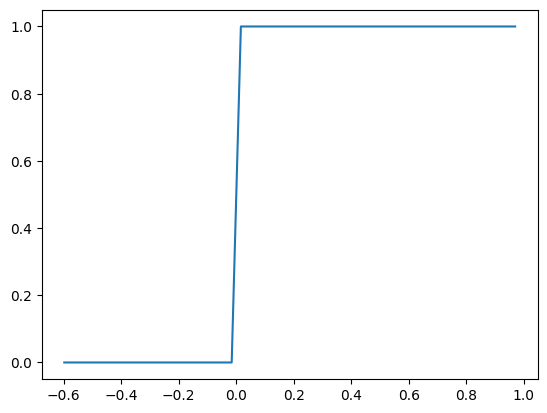

In [382]:
Z = np.random.uniform(-0.6,1,size=(100,1))
plt.plot(np.sort(Z,axis=0),omega(np.sort(Z,axis=0)))
plt.show()

In [383]:
class AlgorithmPerceptron(ClassifierMixin):
    # Taxa de aprendizagem (eta) varia de 0 e 1
    # Número de iteraçoes
    # RandomState : os peso são iniciados aleatoriamente

    w_ = None # Peso das caracteristicas
    b_ = None # Vies 
    m_ = None # Número de instancias das caracteristica
    def __init__(self, eta = 0.001, max_iter = 1_000, random_state = 1):
        self.eta          = eta
        self.max_iter     = max_iter
        self.random_state = random_state
    
    def ErrorsAll(self):
        for iter,value in enumerate(self.erros):
            print(f'Iter {iter}) teve pesos atualizado {value}')

    def fit(self, X:np.array, y:np.array):
        rgen = np.random.RandomState(self.random_state)

        # Inicializando os peso e vies aleatoriamente | ou não
        self.m_ = np.size(X,axis=1)
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size=self.m_)
        self.b_ = np.float64(0.)

        self.erros = []
        for _ in range(self.max_iter):
            errors = 0

            for xi, yi in zip(X,y):
                update = self.eta * (yi - self.predict(xi))    
                self.w_ += update * xi    
                self.b_ += update               
                errors += int(update != 0)
            
            self.erros.append(errors)

        return self
    
    def FuncaoDegrau(self, X):
        return np.where( self.SomaPonderada(X)>=0 , 1, 0)
    
    def SomaPonderada(self, X):
        return np.dot(X,self.w_) + self.b_
    
    def predict(self, X):
        return self.FuncaoDegrau(X)

#### $update$
me ira retorna uma valor igual a 0 ou diferente de 0
* Se for igual a $0$ a predição foi correta
* Se não foi incorreta
    * Com isso atualiza os pesos e vies  
    
**Ex:** 

1. **Iter** :
    * $peso =[0,0]$ || $vies = 0$ || $x¹ = [0 ,1]$
    * update = $\eta \cdot( y^{1} - (predict(x^1)))$ = $0.1 \cdot(1-1) = 0$
        * update = 0 , não atualiza os pesos não a erros
        * peso = peso + 0 * ($x^1$) 
        * vies = vies + 0

2. **Iter** : update = $\eta \cdot( y^{1} - (predict(x^1)))$ = $0.1 \cdot(1-1) = 0$
    *  $peso =[0,0]$ || $vies = 0$ || $x¹ = [2 ,1]$
    * update = $\eta \cdot( y^{2} - (predict(x^2)))$ = $0.1 \cdot(1-0) = 0.1$
        * update = 0.1 , atualiza os pesos e vies
        * peso += 0.1 * ($x^2$) = 0.1 * [2,1] = [0.2,0.1]
        * vies += update = 0.1
> continua assim até terminar o número de epocas

### Carregando dataset

In [384]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,encoding='utf-8')

X = data.iloc[:,:4].values
y = data.iloc[:,4]
y = np.where(y=='Iris-setosa',0,1)



In [385]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=100, random_state=0)

Perceptron : treinando

In [386]:
perceptron = AlgorithmPerceptron(max_iter=100,eta=0.1)
perceptron.fit(xtrain[:,[1,2]],ytrain)

In [393]:
predP = perceptron.predict(xtest[:,[1,2]])

In [394]:
print(classification_report(ytest,predP))
print(accuracy_score(ytest,predP))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

1.0


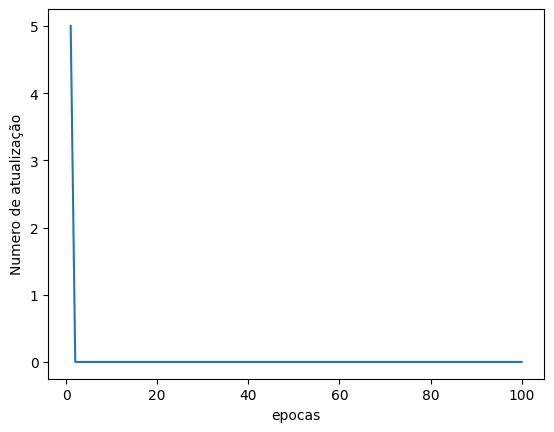

In [395]:
plt.plot(range(1,len(perceptron.erros)+1),perceptron.erros)
plt.ylabel('Numero de atualização')
plt.xlabel('epocas')
plt.show()

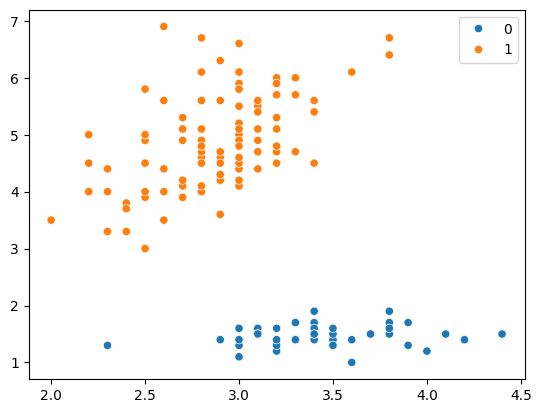

In [396]:
sea.scatterplot(x=X[:,1],y=X[:,2],hue=y)
plt.show()

In [397]:
from matplotlib.colors import ListedColormap
def plotDecisionRegion(X,y,classifier,resolution=0.02):
    marks = ('o','s','^','v','<')
    color = ('red','blue','lightgreen','gray','cyan')

    cmap  = ListedColormap(colors=color[:len(np.unique(y))])

    x1Min, x1Max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2Min, x2Max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1Min,x1Max,resolution),
        np.arange(x2Min,x2Max,resolution)
    ) 
    x = np.array([xx1.ravel(),xx2.ravel()])
    lab = classifier.predict(x.T)

    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[ y == cl,0 ],y=X[ y == cl,1 ] , alpha=0.8,c=color[idx],marker=marks[idx],edgecolors='black')
    
    plt.legend(np.unique(y))
    plt.show()

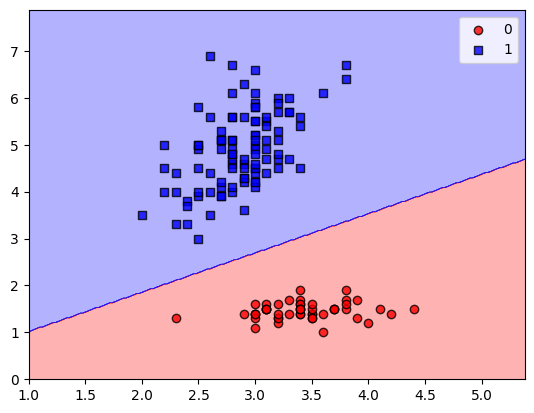

In [398]:
plotDecisionRegion(X[:,[1,2]],y,perceptron)